/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


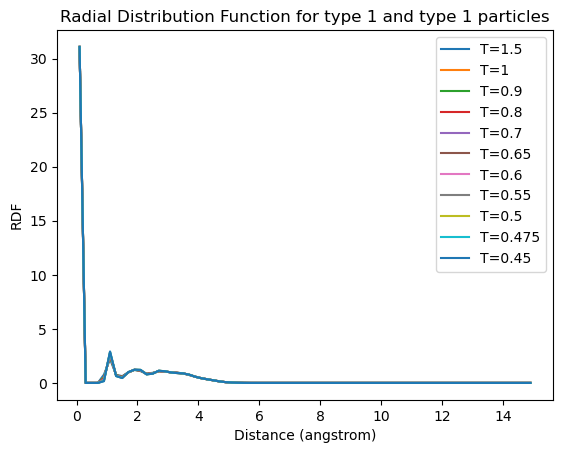

In [1]:
import MDAnalysis
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt

# Define your temperature runs and corresponding files
run = {'1.5': '10000', '1': '50000', '0.9': '150000', '0.8': '150000', 
       '0.7': '180000', '0.65': '350000', '0.6': '1000000', '0.55': '3000000', 
       '0.5': '10000000', '0.475': '30000000', '0.45': '100000000'}

# Load the production data for each temperature
prod_data = {}
for t in run.keys():
    lammpstrj_file = f"../Data/equil/kalj_T{t}_n360_v300_{run[t]}_1.lammpstrj"
    dcd_file = f"../Data/prod/kalj_T{t}_n360_v300_prod_{run[t]}_1.unwrap.dcd"
    prod_data[t] = MDAnalysis.Universe(lammpstrj_file, dcd_file, topology_format="LAMMPSDUMP")

# Function to calculate RDF for given Universe object
def calculate_rdf(universe):
    type1 = universe.select_atoms("type 1")
    type2 = universe.select_atoms("type 2")

    rdf_11 = rdf.InterRDF(type1, type1).run()
    rdf_22 = rdf.InterRDF(type2, type2).run()
    rdf_12 = rdf.InterRDF(type1, type2).run()

    return rdf_11, rdf_22, rdf_12

# Calculate RDF for each temperature and store results
rdf_results = {t: calculate_rdf(prod_data[t]) for t in run.keys()}

# Plot RDF results
def plot_rdf(rdf_data, rdf_type, title, save_path):
    plt.figure()
    for t in rdf_data.keys():
        plt.plot(rdf_data[t][rdf_type].bins, rdf_data[t][rdf_type].rdf, label=f"T={t}")
    plt.xlabel('Distance (angstrom)')
    plt.ylabel('RDF')
    plt.legend()
    plt.title(title)
    plt.savefig(save_path)
    plt.show()

# Plotting RDF for type 1 and type 1 particles
plot_rdf(rdf_results, 0, 'Radial Distribution Function for type 1 and type 1 particles', '../Figures/rdf_1-1.png')
# Repeat for other RDF types as needed


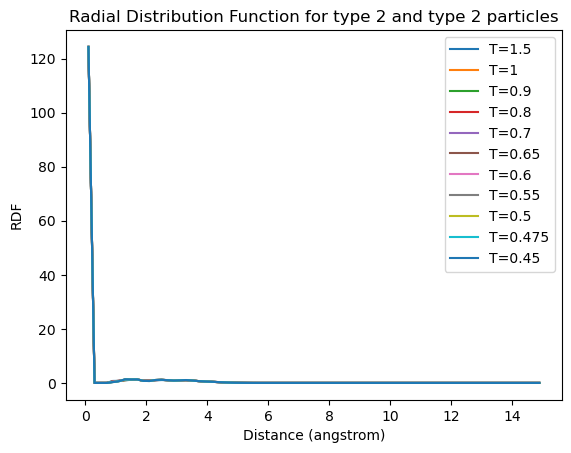

In [2]:
# Function to calculate RDF for given Universe object
def calculate_rdf(universe):
    type2 = universe.select_atoms("type 2")

    rdf_22 = rdf.InterRDF(type2, type2).run()

    return rdf_22

# Calculate RDF for type 2 particles at each temperature and store results
rdf_results_type2 = {t: calculate_rdf(prod_data[t]) for t in run.keys()}

# Plot RDF results for type 2 particles
def plot_rdf_type2(rdf_data, title, save_path):
    plt.figure()
    for t in rdf_data.keys():
        plt.plot(rdf_data[t].bins, rdf_data[t].rdf, label=f"T={t}")
    plt.xlabel('Distance (angstrom)')
    plt.ylabel('RDF')
    plt.legend()
    plt.title(title)
    plt.savefig(save_path)
    plt.show()

# Plotting RDF for type 2 and type 2 particles
plot_rdf_type2(rdf_results_type2, 'Radial Distribution Function for type 2 and type 2 particles', '../Figures/rdf_2-2.png')


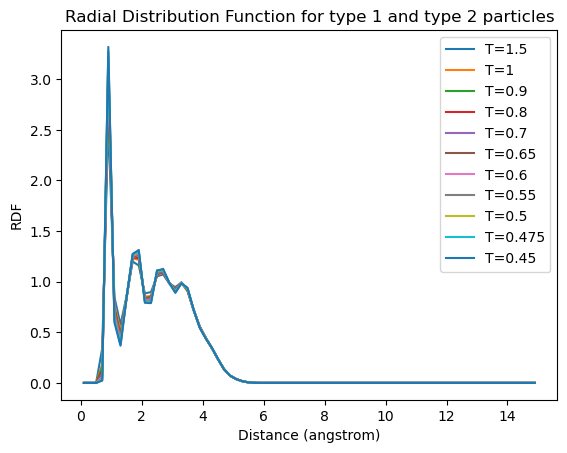

In [3]:
# Function to calculate RDF between type 1 and type 2 particles
def calculate_rdf_12(universe):
    type1 = universe.select_atoms("type 1")
    type2 = universe.select_atoms("type 2")

    rdf_12 = rdf.InterRDF(type1, type2).run()

    return rdf_12

# Calculate RDF for type 1 and type 2 particles at each temperature and store results
rdf_results_12 = {t: calculate_rdf_12(prod_data[t]) for t in run.keys()}

# Plot RDF results for type 1 and type 2 particles
def plot_rdf_12(rdf_data, title, save_path):
    plt.figure()
    for t in rdf_data.keys():
        plt.plot(rdf_data[t].bins, rdf_data[t].rdf, label=f"T={t}")
    plt.xlabel('Distance (angstrom)')
    plt.ylabel('RDF')
    plt.legend()
    plt.title(title)
    plt.savefig(save_path)
    plt.show()

# Plotting RDF for type 1 and type 2 particles
plot_rdf_12(rdf_results_12, 'Radial Distribution Function for type 1 and type 2 particles', '../Figures/rdf_1-2.png')


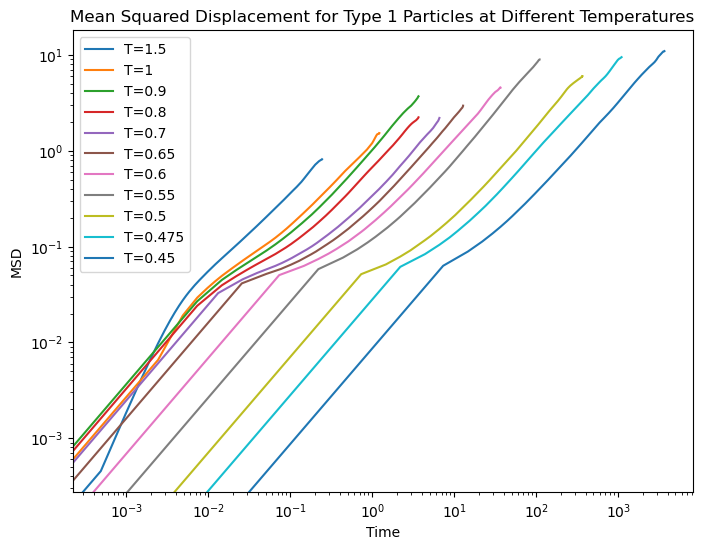

In [6]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import matplotlib.pyplot as plt
import numpy as np

prod_data = {}
for t in run.keys():
    lammpstrj_file = f"../Data/equil/kalj_T{t}_n360_v300_{run[t]}_1.lammpstrj"
    dcd_file = f"../Data/prod/kalj_T{t}_n360_v300_prod_{run[t]}_1.unwrap.dcd"
    prod_data[t] = mda.Universe(lammpstrj_file, dcd_file, topology_format="LAMMPSDUMP")

def calculate_msd(universe):
    type1 = universe.select_atoms("type 1")
    msd_analysis = EinsteinMSD(type1, msd_type='xyz')
    msd_analysis.run()
    return msd_analysis.times, msd_analysis.results.timeseries


msd_results = {t: calculate_msd(prod_data[t]) for t in run.keys()}

plt.figure(figsize=(8, 6))
for t in msd_results.keys():
    times, msd = msd_results[t]
    plt.loglog(times, msd, label=f"T={t}")

plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.title("Mean Squared Displacement for Type 1 Particles at Different Temperatures")
plt.savefig("../Figures/msd_type1.png")
plt.show()


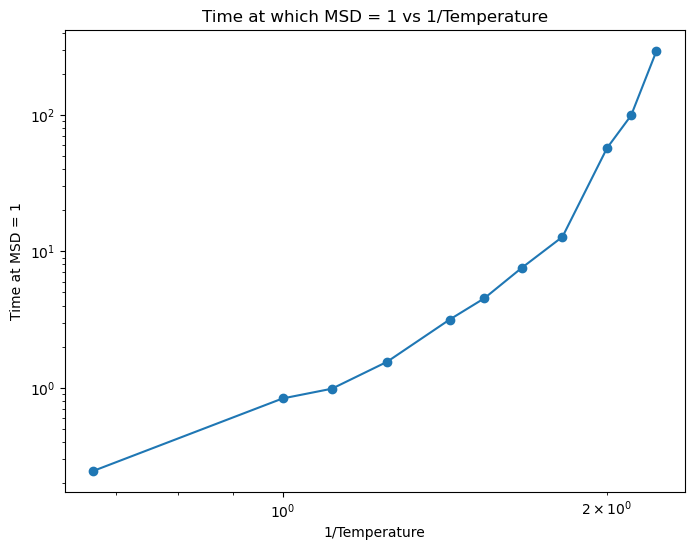

In [7]:
def find_time_at_msd_1(msd_data):
    # Find the index where MSD is closest to 1
    index = (np.abs(msd_data[1] - 1)).argmin()
    return msd_data[0][index]

# Assuming msd_results is a dictionary with keys as temperatures and values as tuples (times, msd_data)
time_at_msd_1 = {t: find_time_at_msd_1(msd_results[t]) for t in msd_results}

inverse_temperatures = [1/float(t) for t in time_at_msd_1.keys()]
times_at_msd_1 = list(time_at_msd_1.values())

plt.figure(figsize=(8, 6))
plt.loglog(inverse_temperatures, times_at_msd_1, marker='o', linestyle='-')
plt.xlabel("1/Temperature")
plt.ylabel("Time at MSD = 1")
plt.title("Time at which MSD = 1 vs 1/Temperature")
plt.savefig("../Figures/time_at_msd_1_vs_inverse_temp.png")
plt.show()
